In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import accuracy_score,roc_auc_score,recall_score,precision_score,classification_report

In [88]:
df=pd.read_csv(r"E:\car_data.csv")

In [89]:
df["Purchased"].value_counts()

0    598
1    402
Name: Purchased, dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [91]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [92]:
df.describe(percentiles=[0.01,0.25,0.75,0.99])

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
1%,10.990000,19.000000,16995.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
99%,990.010000,62.000000,149005.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


# Univerient Analysis

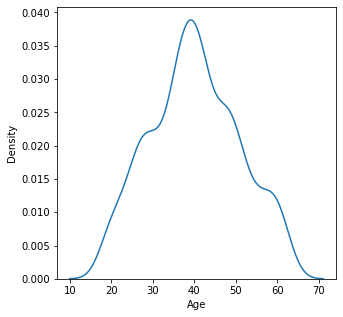

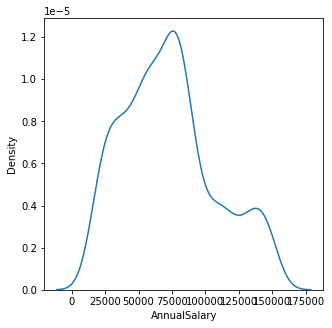

In [93]:
x=["Age","AnnualSalary"]
for i in x:
    plt.figure(figsize=(5,5))
    sns.kdeplot(df[i])

In [94]:
df.drop(columns="User ID",axis=1,inplace=True)

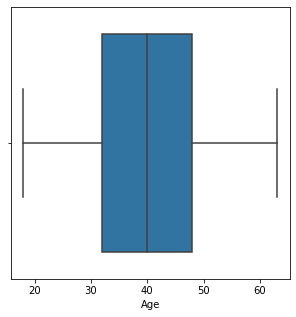

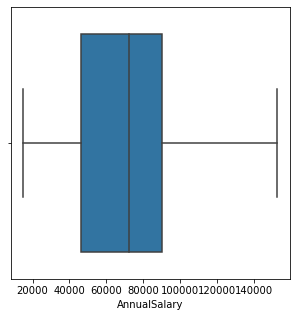

In [95]:
for i in x:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[i])

# Bivarient Analysis

<AxesSubplot:xlabel='Gender', ylabel='Purchased'>

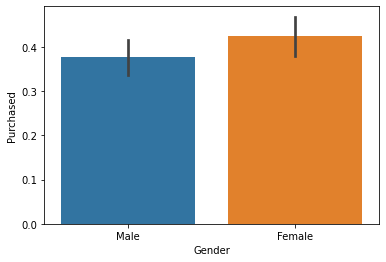

In [96]:
sns.barplot(df["Gender"],df["Purchased"])

In [97]:
# Creating Binn of age column
df_ober=pd.DataFrame()
binn=[18,30,60,100]
df_ober["Binn_age"]= pd.cut(df['Age'],bins = binn, labels = ["Young","Old","Oldest"])

<AxesSubplot:xlabel='Binn_age', ylabel='Purchased'>

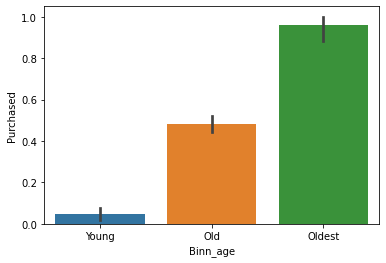

In [98]:
# bar Graph To See the percentage of persons how like to buy the vehicle
sns.barplot(df_ober["Binn_age"],df["Purchased"])

In [99]:
df_ober["AnnualSalary_binn"]=pd.cut(df["AnnualSalary"],bins=[15000,60000,100000,160000],labels=["less","mid","Larg"])

<AxesSubplot:xlabel='AnnualSalary_binn', ylabel='Purchased'>

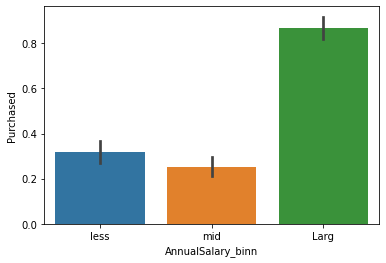

In [100]:
sns.barplot(df_ober["AnnualSalary_binn"],df["Purchased"])

In [101]:
x=(df.loc[(df["AnnualSalary"]>=15000) & (df["AnnualSalary"]<=65000)])
y=pd.cut(x["AnnualSalary"],bins=[15000,25000,35000,45000,55000,65000],labels=["15<25","25<35","35<45","45<55","55<65"])

<AxesSubplot:xlabel='AnnualSalary', ylabel='Purchased'>

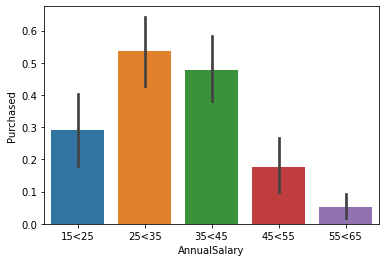

In [102]:
sns.barplot(y,x["Purchased"])

# MultiClass Classification 

<AxesSubplot:xlabel='Binn_age', ylabel='Purchased'>

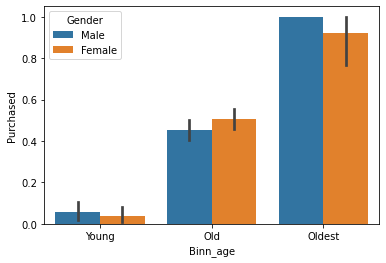

In [103]:
sns.barplot(df_ober["Binn_age"],df["Purchased"],hue=df["Gender"])

<AxesSubplot:xlabel='AnnualSalary_binn', ylabel='Purchased'>

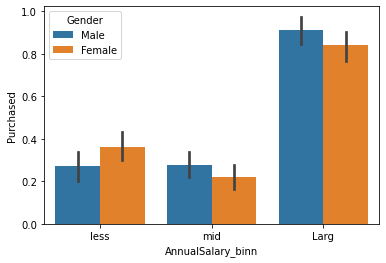

In [104]:
sns.barplot(df_ober["AnnualSalary_binn"],df["Purchased"],hue=df["Gender"])

<AxesSubplot:>

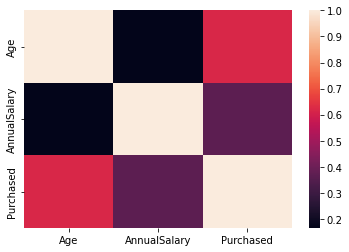

In [105]:
sns.heatmap(df.corr())

In [106]:
# One Hot Encoding On Gender Column

In [107]:
OHE=OneHotEncoder(drop="first")
df["Gender"]=OHE.fit_transform(df[["Gender"]]).toarray()


In [ ]:
# Split Data

In [108]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns="Purchased",axis=1),df["Purchased"],
                                              test_size=0.30,random_state=11)


In [109]:
# Scalling

In [110]:
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(x_train)
X_test_scale=scaler.transform(x_test)

# LogisticRegression

In [111]:
Logi_regre=LogisticRegression()
Logi_regre.fit(X_train_scale,y_train)

LogisticRegression()

In [112]:
y_pred=Logi_regre.predict(X_test_scale)

In [113]:
accu_Logistic=accuracy_score(y_test,y_pred)
accu_Logistic

0.8233333333333334

In [114]:
recall=recall_score(y_test,y_pred)
recall

0.7350427350427351

In [115]:
precision=precision_score(y_test,y_pred)
precision

0.7962962962962963

In [116]:
class_repo=classification_report(y_test,y_pred)
print(class_repo)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       183
           1       0.80      0.74      0.76       117

    accuracy                           0.82       300
   macro avg       0.82      0.81      0.81       300
weighted avg       0.82      0.82      0.82       300



# KNeighborsClassifier

In [117]:
knn=KNeighborsClassifier()
knn.fit(X_train_scale,y_train)

KNeighborsClassifier()

In [118]:
knn_test_pred=knn.predict(X_test_scale)
accuracy_knn=accuracy_score(y_test,knn_test_pred)
accuracy_knn

0.9033333333333333

In [119]:
recall_knn=recall_score(y_test,knn_test_pred)
precision_knn=precision_score(y_test,knn_test_pred)
print("Recall_score=",recall_knn)
print("Precision_score=",precision_knn)

Recall_score= 0.905982905982906
Precision_score= 0.8548387096774194


In [120]:
roc_auc=roc_auc_score(y_test,knn_test_pred)
print("roc_auc_score=",roc_auc)

roc_auc_score= 0.9038111251226005


In [121]:
class_repo_KNN=classification_report(y_test,knn_test_pred)
print(class_repo_KNN)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       183
           1       0.85      0.91      0.88       117

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300



# DecisionTreeClassifier

In [122]:
DT=DecisionTreeClassifier()
DT.fit(X_train_scale,y_train)

DecisionTreeClassifier()

In [123]:
DT_Pred=DT.predict(X_test_scale)
accuracy_DT=accuracy_score(y_test,DT_Pred)
accuracy_DT

0.8833333333333333

In [124]:
recall_DT=recall_score(y_test,DT_Pred)
precision_DT=precision_score(y_test,DT_Pred)
print("Recall_score=",recall_DT)
print("Precision_score=",precision_DT)

Recall_score= 0.8803418803418803
Precision_score= 0.8306451612903226


In [125]:
roc_auc_DT=roc_auc_score(y_test,DT_Pred)
print("roc_auc_score=",roc_auc_DT)

roc_auc_score= 0.8827938909906122


In [126]:
class_repo_DT=classification_report(y_test,DT_Pred)
print(class_repo_DT)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       183
           1       0.83      0.88      0.85       117

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300



# Hyper-Parameter Tunning

In [127]:
random_grid = {
               'max_features': ['auto', 'sqrt','log2'],
               'max_depth': [int(x) for x in np.linspace(10, 1000,10)],
               'min_samples_split': [2, 5, 10,14],
               'min_samples_leaf':  [1, 2, 4,6,8],
              'criterion':['entropy','gini']}
print(random_grid)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [128]:
DT_randomcv=RandomizedSearchCV(estimator=DT,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
DT_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14]},
                   random_state=100, verbose=2)

In [129]:
DT_randomcv.best_params_

{'min_samples_split': 14,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': 670,
 'criterion': 'gini'}

In [130]:
DT_2=DecisionTreeClassifier(min_samples_split= 5,
 min_samples_leaf= 8,
 max_features= 'sqrt',
 max_depth= 890,
 criterion= 'entropy')

In [131]:
DT_2.fit(X_train_scale,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=890, max_features='sqrt',
                       min_samples_leaf=8, min_samples_split=5)

In [134]:
DT_2_pred=DT_2.predict(X_test_scale)

In [135]:
accuracy_DT_2=accuracy_score(y_test,DT_2_pred)
accuracy_DT_2

0.8366666666666667

In [136]:
recall_DT_2=recall_score(y_test,DT_2_pred)
precision_DT_2=precision_score(y_test,DT_2_pred)
print("Recall_score=",recall_DT_2)
print("Precision_score=",precision_DT_2)

Recall_score= 0.811965811965812
Precision_score= 0.7786885245901639


In [137]:
class_repo_DT_2=classification_report(y_test,DT_2_pred)
print(class_repo_DT_2)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       183
           1       0.78      0.81      0.79       117

    accuracy                           0.84       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.84      0.84      0.84       300



In [141]:
Random=RandomForestClassifier()

In [142]:
Random.fit(X_train_scale,y_train)

RandomForestClassifier()

In [143]:
Random_pred=Random.predict(X_test_scale)
accuracyRandom=accuracy_score(y_test,Random_pred)
accuracyRandom

0.8933333333333333

In [144]:
recall_Random=recall_score(y_test,Random_pred)
precision_Random=precision_score(y_test,Random_pred)
print("Recall_score=",recall_Random)
print("Precision_score=",precision_Random)

Recall_score= 0.9145299145299145
Precision_score= 0.8294573643410853


In [145]:
class_repo_Random=classification_report(y_test,Random_pred)
print(class_repo_Random)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       183
           1       0.83      0.91      0.87       117

    accuracy                           0.89       300
   macro avg       0.89      0.90      0.89       300
weighted avg       0.90      0.89      0.89       300



In [76]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [146]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 1000,
 'criterion': 'gini'}

In [147]:
rf_Algo=RandomForestClassifier(n_estimators= 200,
 min_samples_split=10,
 min_samples_leaf= 1,
 max_features='sqrt',
 max_depth=560,
 criterion= 'gini')

In [148]:
rf_Algo.fit(X_train_scale,y_train)

RandomForestClassifier(max_depth=560, min_samples_split=10, n_estimators=200)

In [149]:
rf_pred=rf_Algo.predict(X_test_scale)

In [150]:
accuracy_RF=accuracy_score(y_test,rf_pred)
accuracy_RF

0.8966666666666666

In [151]:
recall_RF=recall_score(y_test,rf_pred)
precision_RF=precision_score(y_test,rf_pred)
print("Recall_score=",recall_RF)
print("Precision_score=",precision_RF)

Recall_score= 0.9230769230769231
Precision_score= 0.8307692307692308


In [152]:
roc_auc=roc_auc_score(y_test,rf_pred)
print("roc_auc_score=",roc_auc)

roc_auc_score= 0.9014291719209752


In [159]:
Exgboost=ExtraTreesClassifier()
Exgboost.fit(X_train_scale,y_train)

ExtraTreesClassifier()

In [160]:
Exgboost_pred=Exgboost.predict(X_test_scale)
accuracy_Exgboost=accuracy_score(y_test,Exgboost_pred)
print("Accuracy=",accuracy_Exgboost)

Accuracy= 0.8933333333333333


In [ ]:
Conclusion:-Knn give the best performance and highest accuracy which is 90%